## Figure 5: Partial dependence

This notebook reproduces Figure 5 (partial dependence plots for the important features identified in `Fig-04-feature_importance.ipynb`).

N.B. This notebook can be relatively expensive to run (40-50 minutes using 6-8 processes). For this reason, the results are saved to a `.joblib` file and reused if possible.

In [1]:
use_extracted_data = False

In [2]:
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from joblib import (
    dump,
    load,
)
from sklearn.inspection import PartialDependenceDisplay

from lib.check_files import (
    check_prepared_data,
)
from lib.partial_dependence import (
    adjust_plot,
    get_display_kw,
)

# Suppress FutureWarning for some versions of Scikit-learn
%env PYTHONWARNINGS=ignore::FutureWarning
warnings.simplefilter("ignore", FutureWarning)

# Number of processes used to calculate partial dependence
# N.B. The PU classifiers likely already use multiple threads
# (the `n_jobs` parameter in `01-create_pu_classifier.ipynb`),
# so total CPU usage will be significantly greater
n_jobs = 4

env: PYTHONWARNINGS=ignore::FutureWarning


### Load PU classifier and training data

In [3]:
if use_extracted_data:
    data_dir = "extracted_data"
else:
    data_dir = "prepared_data"
    check_prepared_data(data_dir, verbose=True)
input_dir = "outputs"
output_dir = "figures"
os.makedirs(output_dir, exist_ok=True)
supplement_dir = "supplementary_figures"
os.makedirs(supplement_dir, exist_ok=True)

classifier_filename = os.path.join(input_dir, "pu_classifier.joblib")
pd_filename = os.path.join(input_dir, "partial_dependence.joblib")

training_filename = os.path.join(data_dir, "training_data.csv")

output_basename = os.path.join(output_dir, "Fig-05-partial_dependence")

classifier = load(classifier_filename)
df_training = pd.read_csv(training_filename)

### Calculate or load partial dependence, then plot

Loading results from file: outputs/partial_dependence.joblib


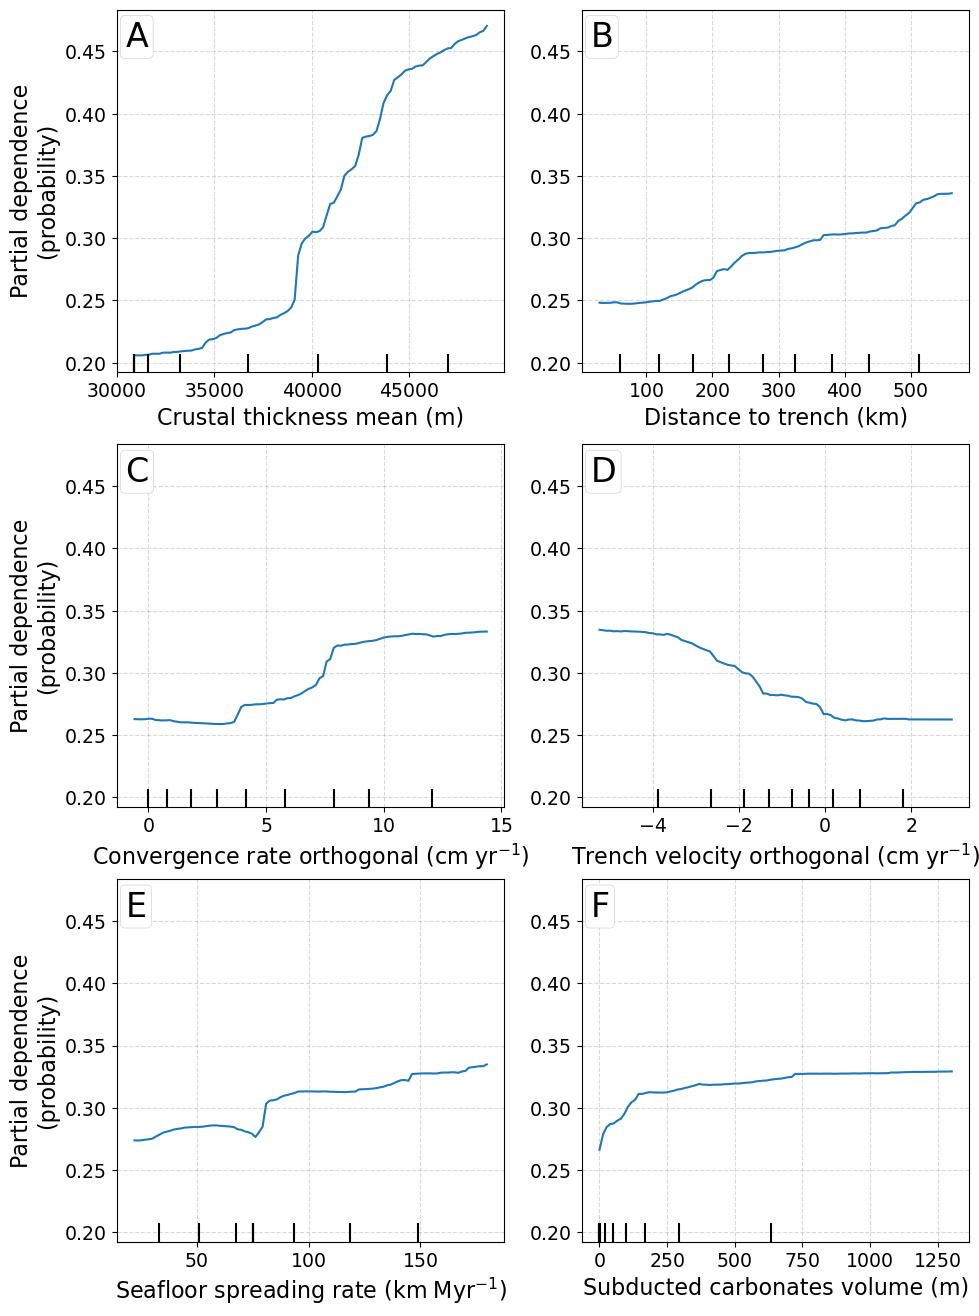

In [4]:
fontsize = 16
ticksize = fontsize * 0.85

if os.path.isfile(pd_filename):
    print(f"Loading results from file: {pd_filename}")
    disp = load(pd_filename)
    if not isinstance(disp, PartialDependenceDisplay):
        raise TypeError(
            "Invalid type: {}".format(type(disp))
        )
    plt.close("all")  # Jupyter sometimes displays the plot multiple times
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(11, 16))
    disp.plot(ax=np.ravel(axs))
else:
    disp_kwargs = get_display_kw(
        classifier=classifier,
        data=df_training,
        n_jobs=n_jobs,
    )
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(11, 16))
    disp = PartialDependenceDisplay.from_estimator(
        ax=np.ravel(axs),
        verbose=True,
        **disp_kwargs,
    )
    dump(disp, pd_filename)

adjust_plot(
    axs,
    textsize=fontsize * 1.5,
    fontsize=fontsize,
    labelsize=ticksize,
)

for ext in (".png", ".pdf"):
    output_filename = output_basename + ext
    fig.savefig(
        output_filename,
        dpi=350,
        bbox_inches="tight",
    )

### North America only

In [5]:
classifier_filename = os.path.join(input_dir, "pu_classifier_NA.joblib")
pd_filename = os.path.join(input_dir, "partial_dependence_NA.joblib")

output_basename = os.path.join(supplement_dir, "partial_dependence_NA")

classifier = load(classifier_filename)
df_training = pd.read_csv(training_filename)

Loading results from file: outputs/partial_dependence_NA.joblib


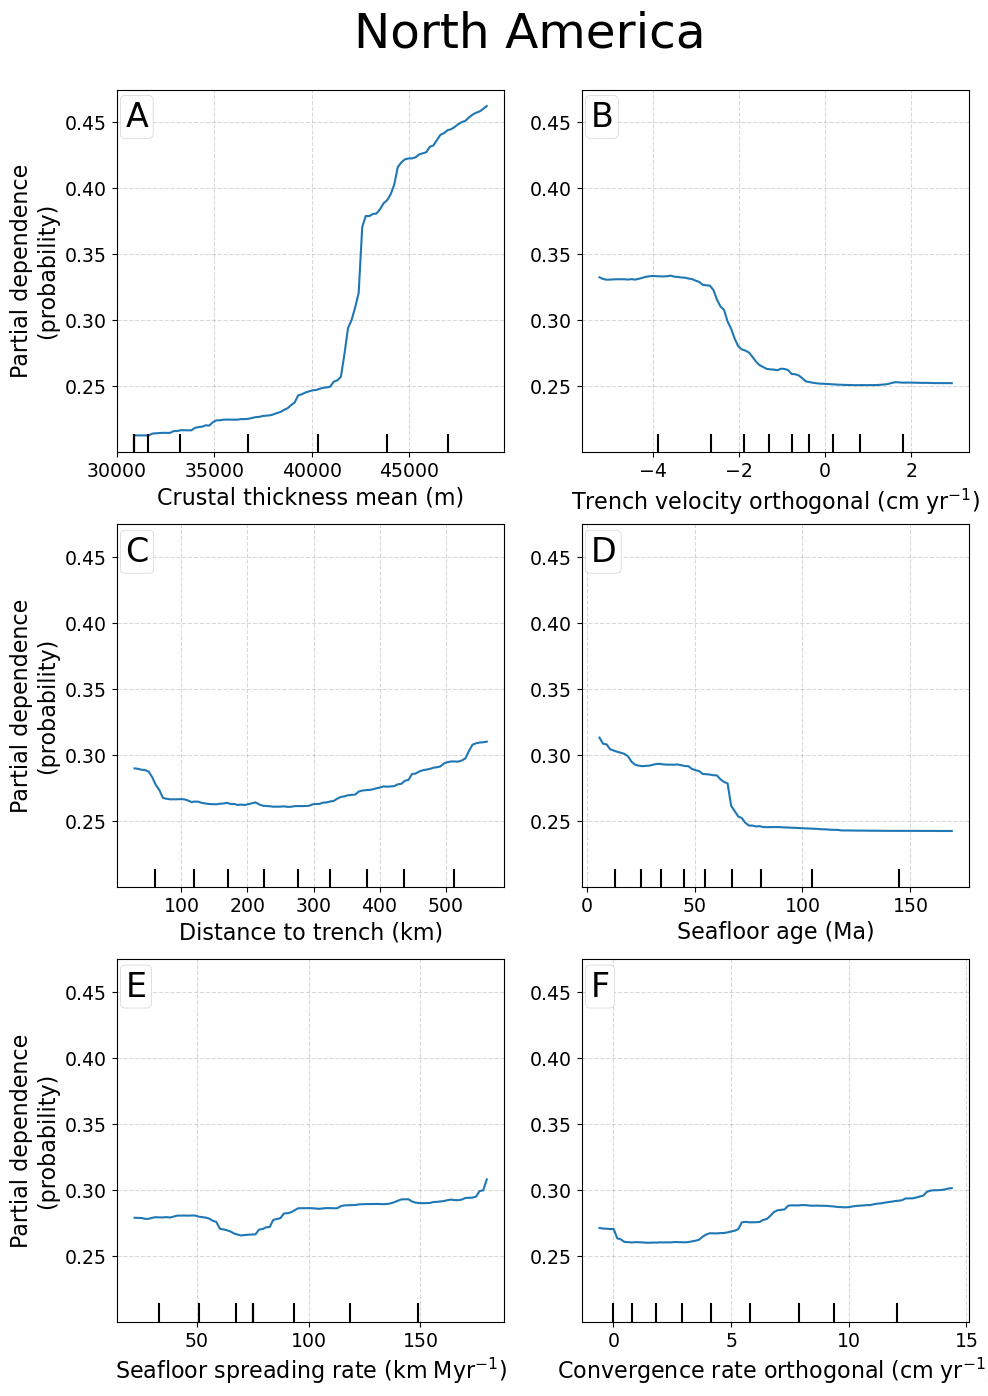

In [6]:
fontsize = 16
ticksize = fontsize * 0.85

if os.path.isfile(pd_filename):
    print(f"Loading results from file: {pd_filename}")
    disp = load(pd_filename)
    if not isinstance(disp, PartialDependenceDisplay):
        raise TypeError(
            "Invalid type: {}".format(type(disp))
        )
    plt.close("all")  # Jupyter sometimes displays the plot multiple times
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(11, 16))
    disp.plot(ax=np.ravel(axs))
else:
    disp_kwargs = get_display_kw(
        classifier=classifier,
        data=df_training,
        n_jobs=n_jobs,
    )
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(11, 16))
    disp = PartialDependenceDisplay.from_estimator(
        ax=np.ravel(axs),
        verbose=True,
        **disp_kwargs,
    )
    dump(disp, pd_filename)

adjust_plot(
    axs,
    textsize=fontsize * 1.5,
    fontsize=fontsize,
    labelsize=ticksize,
)
fig.suptitle("North America", fontsize=35, y=0.93)

for ext in (".png", ".pdf"):
    output_filename = output_basename + ext
    fig.savefig(
        output_filename,
        dpi=350,
        bbox_inches="tight",
    )

### South America only

In [7]:
classifier_filename = os.path.join(input_dir, "pu_classifier_SA.joblib")
pd_filename = os.path.join(input_dir, "partial_dependence_SA.joblib")

output_basename = os.path.join(supplement_dir, "partial_dependence_SA")

classifier = load(classifier_filename)
df_training = pd.read_csv(training_filename)

Loading results from file: outputs/partial_dependence_SA.joblib


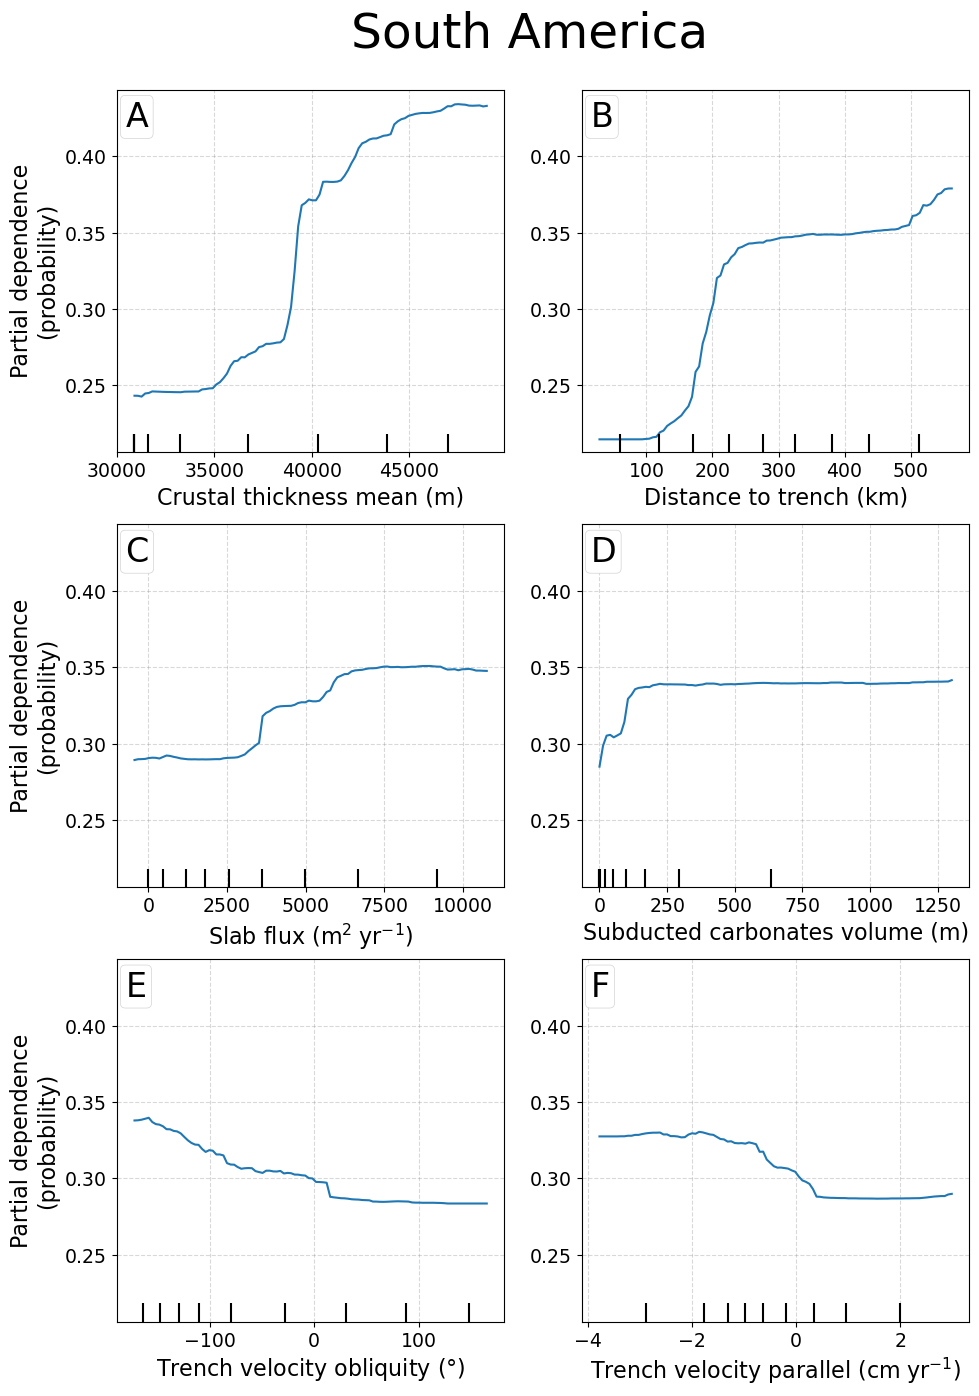

In [8]:
fontsize = 16
ticksize = fontsize * 0.85

if os.path.isfile(pd_filename):
    print(f"Loading results from file: {pd_filename}")
    disp = load(pd_filename)
    if not isinstance(disp, PartialDependenceDisplay):
        raise TypeError(
            "Invalid type: {}".format(type(disp))
        )
    plt.close("all")  # Jupyter sometimes displays the plot multiple times
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(11, 16))
    disp.plot(ax=np.ravel(axs))
else:
    disp_kwargs = get_display_kw(
        classifier=classifier,
        data=df_training,
        n_jobs=n_jobs,
    )
    fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(11, 16))
    disp = PartialDependenceDisplay.from_estimator(
        ax=np.ravel(axs),
        verbose=True,
        **disp_kwargs,
    )
    dump(disp, pd_filename)

adjust_plot(
    axs,
    textsize=fontsize * 1.5,
    fontsize=fontsize,
    labelsize=ticksize,
)
fig.suptitle("South America", fontsize=35, y=0.93)

for ext in (".png", ".pdf"):
    output_filename = output_basename + ext
    fig.savefig(
        output_filename,
        dpi=350,
        bbox_inches="tight",
    )